In [1]:
! nvidia-smi

Tue May  7 20:04:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import time
import pandas as pd
import numpy as np
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

In [35]:
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-xl")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-xl").to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.45G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [7]:


import json

with open('multinli.jsonl', 'r') as f:
  for line in f:
    data = json.loads(line)
    print(data)


{'annotator_labels': ['contradiction'], 'genre': 'government', 'gold_label': 'contradiction', 'pairID': '43802c', 'promptID': '43802', 'sentence1': 'Many migrant farm workers are reluctant to report pesticide problems because they fear they will lose their jobs, laborers said.', 'sentence1_binary_parse': '( ( ( Many ( migrant ( farm workers ) ) ) ( are ( reluctant ( to ( ( report ( pesticide problems ) ) ( because ( they ( fear ( they ( will ( lose ( their jobs ) ) ) ) ) ) ) ) ) ) ) ) ( , ( laborers ( said . ) ) ) )', 'sentence1_parse': '(ROOT (S (S (NP (JJ Many) (NN migrant) (NN farm) (NNS workers)) (VP (VBP are) (ADJP (JJ reluctant) (S (VP (TO to) (VP (VB report) (NP (NN pesticide) (NNS problems)) (SBAR (IN because) (S (NP (PRP they)) (VP (VBP fear) (SBAR (S (NP (PRP they)) (VP (MD will) (VP (VB lose) (NP (PRP$ their) (NNS jobs))))))))))))))) (, ,) (NP (NNS laborers)) (VP (VBD said)) (. .)))', 'sentence2': 'Reports from the farmers about pesticide problems come almost everyday.', 'se

In [15]:


with open('multinli.txt', 'w') as f:
  f.write('gold_label\tsentence1\tsentence2\n')
  with open('multinli.jsonl', 'r') as f2:
    for line in f2:
      data = json.loads(line)
      f.write(f'{data["gold_label"]}\t{data["sentence1"]}\t{data["sentence2"]}\n')


In [16]:
df_test = pd.read_csv("multinli.txt", sep="\t")

In [17]:
df_test

,gold_label,sentence1,sentence2
0,contradiction,Many migrant farm workers are reluctant to rep...,Reports from the farmers about pesticide probl...
1,entailment,"In those peaceful years, without threat of for...","During these years, no wars or invasions took ..."
2,entailment,The information on the three documents had to ...,There is more than enough details provided in ...
3,neutral,Leading commercial companies do not make signi...,The policy of not investing in products until ...
4,neutral,Program and justice community success is tied ...,Program success is evaluated in terms of diver...
...,...,...,...
1959,contradiction,After initial conversations with a number of o...,"After talking to 10 organizations, we decided ..."
1960,entailment,i can't remember his first name,His first name escapes me.
1961,neutral,Noting the team's decision to arrange its own ...,The team was unhappy with the plans that had b...
1962,neutral,The people farmed and fished; on the dawning o...,The people farmed until they learned to use me...


In [18]:
df_test.drop(df_test.columns.difference(['gold_label','sentence1', 'sentence2']), axis=1, inplace=True) ## to drop the columns

In [19]:
df_test

,gold_label,sentence1,sentence2
0,contradiction,Many migrant farm workers are reluctant to rep...,Reports from the farmers about pesticide probl...
1,entailment,"In those peaceful years, without threat of for...","During these years, no wars or invasions took ..."
2,entailment,The information on the three documents had to ...,There is more than enough details provided in ...
3,neutral,Leading commercial companies do not make signi...,The policy of not investing in products until ...
4,neutral,Program and justice community success is tied ...,Program success is evaluated in terms of diver...
...,...,...,...
1959,contradiction,After initial conversations with a number of o...,"After talking to 10 organizations, we decided ..."
1960,entailment,i can't remember his first name,His first name escapes me.
1961,neutral,Noting the team's decision to arrange its own ...,The team was unhappy with the plans that had b...
1962,neutral,The people farmed and fished; on the dawning o...,The people farmed until they learned to use me...


In [20]:
df_test = df_test[df_test['gold_label'] != '-'].reset_index(drop=True)

In [21]:
df_test[:10]

,gold_label,sentence1,sentence2
0,contradiction,Many migrant farm workers are reluctant to rep...,Reports from the farmers about pesticide probl...
1,entailment,"In those peaceful years, without threat of for...","During these years, no wars or invasions took ..."
2,entailment,The information on the three documents had to ...,There is more than enough details provided in ...
3,neutral,Leading commercial companies do not make signi...,The policy of not investing in products until ...
4,neutral,Program and justice community success is tied ...,Program success is evaluated in terms of diver...
5,neutral,"Once released, these pollutants together with ...","Once released, these pollutants with their tra..."
6,neutral,well it's not surprising considering how close...,It only takes a few minutes to get to Dallas f...
7,neutral,"To my surprise, he did not examine them, merel...",Poirot thought it was important to be ruled by...
8,neutral,"While the branches are largely noncompeting, s...","About 15,000 jobs are going to be eliminated i..."
9,neutral,We also coordinated with other GAO representat...,We found out that eleven states had successful...


In [22]:
df_test.to_csv('test.txt', sep='\t', index=False)


In [25]:
with open('test.txt','r') as f:
  for line in f:
    print(line)

gold_label	sentence1	sentence2

contradiction	Many migrant farm workers are reluctant to report pesticide problems because they fear they will lose their jobs, laborers said.	Reports from the farmers about pesticide problems come almost everyday.

entailment	In those peaceful years, without threat of foreign invasion or civil war, there were no city ramparts.	During these years, no wars or invasions took place.

entailment	The information on the three documents had to be of sufficient detail to allow an effective comparison to occur.	There is more than enough details provided in the documents to make comparisons. 

neutral	Leading commercial companies do not make significant investments to continue a product development or its production until they have knowledge that the product's design works and it can be manufactured efficiently within cost and schedule expectations.	The policy of not investing in products until they are profitable is why some companies are leading in the industry.

In [26]:
gold_labels = pd.read_csv("test.txt", sep="\t", usecols=["gold_label"])

In [27]:
# save the gold_labels in a txt file

gold_labels.to_csv('gold_labels.txt', index=False, header=False)

In [28]:
#convert these gold_labels.txt file into a list such that entailement=1, contradiction=2 and neutral=3

test_gold_labels_list = []
with open('gold_labels.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line == 'entailment':
            test_gold_labels_list.append(1)
        elif line == 'contradiction':
            test_gold_labels_list.append(2)
        elif line == 'neutral':
            test_gold_labels_list.append(3)

In [29]:
df_test.groupby('gold_label').count()

,sentence1,sentence2
gold_label,,
contradiction,669,669
entailment,633,633
neutral,662,662


In [30]:
prompt = "What is the relationship of the second sentence with the first sentence?\nSENTENCE 1: {sentence1} \nSENTENCE 2: {sentence2} \nOPTIONS:\n- entailment  \n- contradiction \n- neutral. \n Answer in single word only."

In [31]:
sentences = []
for i in range(len(df_test['sentence1'])):  # Assuming all columns are the same length
    sentences.append([df_test['sentence1'][i], df_test['sentence2'][i], df_test['gold_label'][i]])

In [32]:
import re
input_text = []
for sentence1, sentence2, label in sentences:
    prompt_new = re.sub('{sentence1}', sentence1, prompt)
    prompt_new = re.sub('{sentence2}', sentence2, prompt_new)
    input_text.append(prompt_new)

In [33]:
sentences[:10]

[['Many migrant farm workers are reluctant to report pesticide problems because they fear they will lose their jobs, laborers said.',
  'Reports from the farmers about pesticide problems come almost everyday.',
  'contradiction'],
 ['In those peaceful years, without threat of foreign invasion or civil war, there were no city ramparts.',
  'During these years, no wars or invasions took place.',
  'entailment'],
 ['The information on the three documents had to be of sufficient detail to allow an effective comparison to occur.',
  'There is more than enough details provided in the documents to make comparisons. ',
  'entailment'],
 ["Leading commercial companies do not make significant investments to continue a product development or its production until they have knowledge that the product's design works and it can be manufactured efficiently within cost and schedule expectations.",
  'The policy of not investing in products until they are profitable is why some companies are leading in 

In [34]:
input_text[:10]

['What is the relationship of the second sentence with the first sentence?\nSENTENCE 1: Many migrant farm workers are reluctant to report pesticide problems because they fear they will lose their jobs, laborers said. \nSENTENCE 2: Reports from the farmers about pesticide problems come almost everyday. \nOPTIONS:\n- entailment  \n- contradiction \n- neutral. \n Answer in single word only.',
 'What is the relationship of the second sentence with the first sentence?\nSENTENCE 1: In those peaceful years, without threat of foreign invasion or civil war, there were no city ramparts. \nSENTENCE 2: During these years, no wars or invasions took place. \nOPTIONS:\n- entailment  \n- contradiction \n- neutral. \n Answer in single word only.',
 'What is the relationship of the second sentence with the first sentence?\nSENTENCE 1: The information on the three documents had to be of sufficient detail to allow an effective comparison to occur. \nSENTENCE 2: There is more than enough details provided i

In [36]:
def generate(input_text):
  input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to("cuda")
  output = model.generate(input_ids, max_length=100)
  return tokenizer.decode(output[0], skip_special_tokens=True)

In [37]:
#pass the input_text generated from the above into this function generate and save the output in a .txt file

output_text = []
for text in input_text:
  output_text.append(generate(text))

with open('output.txt', 'w') as f:
  for text in output_text:
    f.write(text + '\n')

In [38]:
output_gold_labels_list = []
with open('output.txt', 'r') as f:
    count=0
    for line in f:
        line = line.strip()
        print(line)
        if line == 'entailment':
            output_gold_labels_list.append(1)
        elif line == 'contradiction':
            output_gold_labels_list.append(2)
        elif line == 'neutral':
            output_gold_labels_list.append(3)
        else:
            count+=1

contradiction
entailment
contradiction
neutral
entailment
neutral
neutral
neutral
entailment
neutral
contradiction
neutral
contradiction
entailment
contradiction
entailment
entailment
entailment
contradiction
contradiction
contradiction
neutral
entailment
neutral
contradiction
entailment
neutral
contradiction
entailment
contradiction
neutral
entailment
contradiction
neutral
neutral
entailment
entailment
entailment
entailment
contradiction
neutral
neutral
entailment
contradiction
entailment
entailment
contradiction
entailment
contradiction
neutral
contradiction
contradiction
neutral
contradiction
entailment
entailment
entailment
contradiction
contradiction
entailment
entailment
contradiction
neutral
contradiction
neutral
entailment
contradiction
entailment
contradiction
entailment
contradiction
contradiction
neutral
contradiction
neutral
contradiction
contradiction
entailment
contradiction
contradiction
neutral
neutral
contradiction
contradiction
entailment
contradiction
entailment
neut

In [39]:


from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

accuracy  = accuracy_score(output_gold_labels_list, test_gold_labels_list)
precision = precision_score(output_gold_labels_list, test_gold_labels_list, average='macro')  # Use 'macro' for potential class imbalance
recall    = recall_score(output_gold_labels_list, test_gold_labels_list, average='macro')
f1        = f1_score(output_gold_labels_list, test_gold_labels_list, average='macro')

# Print Results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8365580448065173
Precision: 0.8377804764836795
Recall: 0.8447013269798079
F1-Score: 0.8313536644320191


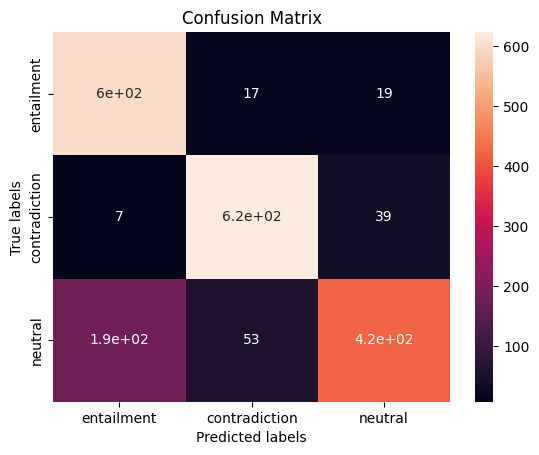

In [40]:
#generate confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test_gold_labels_list, output_gold_labels_list)

# Configure plot
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)  # Annotate cells with values

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x-axis and y-axis
ax.xaxis.set_ticklabels(['entailment', 'contradiction', 'neutral'])
ax.yaxis.set_ticklabels(['entailment', 'contradiction', 'neutral'])

# Display the plot
plt.show()

Normalized Confusion Matrix:
[[0.94312796 0.02685624 0.0300158 ]
 [0.01046338 0.93124066 0.05829596]
 [0.28096677 0.08006042 0.63897281]]


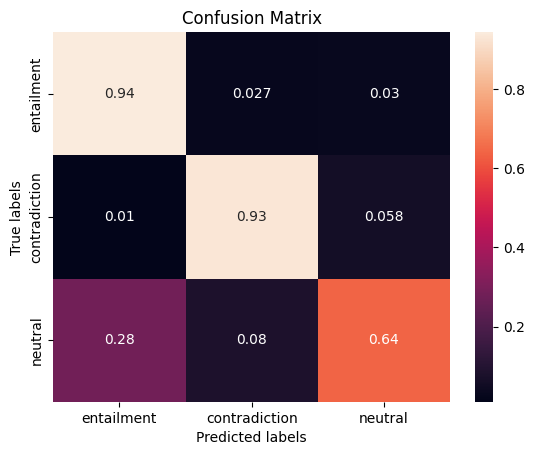

In [41]:

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print("Normalized Confusion Matrix:")
print(cm_normalized)
ax = plt.subplot()
sns.heatmap(cm_normalized, annot=True, ax=ax)  # Annotate cells with values

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x-axis and y-axis
ax.xaxis.set_ticklabels(['entailment', 'contradiction', 'neutral'])
ax.yaxis.set_ticklabels(['entailment', 'contradiction', 'neutral'])

# Display the plot
plt.show()
